                                    PUNTO 1 - Monte Carlo y la integral de camino de Feynman - (CON BONO)

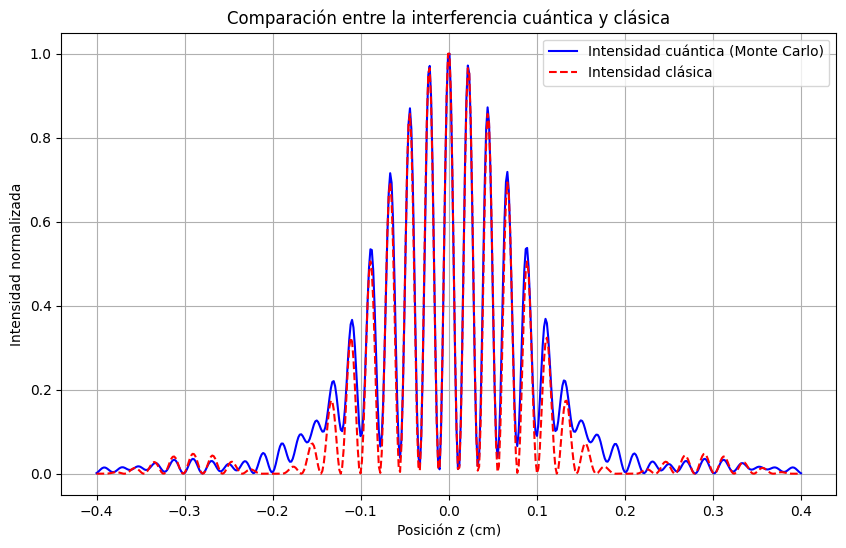

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos las constantes del problema en centímetros

D1 = 30  # Distancia de la primera pantalla
D2 = 30  # Distancia de la segunda pantalla
lambda_ = 670e-7  # Longitud de onda en cm (670 nm)
A = 0.1  # Ancho total del haz en cm
a = 0.01  # Ancho de cada rendija en cm
d = 0.09  # Separación entre las rendijas en cm
N = 100000  # Número de muestras aleatorias
z_values = np.linspace(-0.4, 0.4, 500)  # Rango de valores de z en cm


x_muestras = np.random.uniform(-A / 2, A / 2, N)

#Generamos las muestras aleatorias para y, teniendo en cuenta las dos rendijas

y_muestras = np.concatenate((
    np.random.uniform(-a / 2 - d / 2, a / 2 - d / 2, N // 2),
    np.random.uniform(d / 2 - a / 2, d / 2 + a / 2, N // 2)
))


def intensidad_cuantica(z):
    
    integrando = np.exp((2j * np.pi * (D1 + D2)) / lambda_) * \
                 np.exp((1j * np.pi) / (lambda_ * D1)) * (x_muestras - y_muestras)**2 * \
                 np.exp((1j * np.pi / (lambda_ * D1)) * (z - y_muestras)**2)
    
    
    return np.abs(np.mean(integrando))**2

#Calculamos la intensidad cuántica para cada valor de z y normalizamos
intensidades_cuanticas = np.array([intensidad_cuantica(z) for z in z_values])
intensidades_cuanticas /= np.max(intensidades_cuanticas)


#Definimos la intensidad clásica usando el modelo de Huygens-Fresnel
def intensidad_clasica(z):
    theta = np.arctan(z / D2)
    termino_sinc = (np.sinc((a / lambda_) * np.sin(theta)))**2
    termino_cos = np.cos((np.pi * d / lambda_) * np.sin(theta))**2
    return termino_cos * termino_sinc


#Calculamos la intensidad clásica para cada z y normalizamos
intensidades_clasicas = np.array([intensidad_clasica(z) for z in z_values])
intensidades_clasicas /= np.max(intensidades_clasicas)


#Intensidades cuántica y clásica (gráficas)
plt.figure(figsize=(10, 6))
plt.plot(z_values, intensidades_cuanticas, label='Intensidad cuántica (Monte Carlo)', color='blue')
plt.plot(z_values, intensidades_clasicas, label='Intensidad clásica', color='red', linestyle='--')
plt.xlabel('Posición z (cm)')
plt.ylabel('Intensidad normalizada')
plt.title('Comparación entre la interferencia cuántica y clásica')
plt.legend()
plt.grid(True)
plt.show()


La diferencia entre las intensidades cuántica y clásica radica en cómo se describen las trayectorias de la luz al atravesar las rendijas. En el modelo cuántico, la intensidad se calcula usando el método de Monte Carlo, que simula la probabilidad de que un fotón pase por diferentes caminos posibles y llegue a un punto \( z \). Esto se realiza generando muchas muestras aleatorias que representan la posición inicial y final del fotón en las rendijas. Al sumar las contribuciones de cada fotón, se obtiene una estimación probabilística de la intensidad, mostrando cómo se distribuyen las partículas en función de la posición.

En contraste, el modelo clásico utiliza una fórmula analítica (Huygens-Fresnel) basada en la superposición de ondas, asumiendo que la luz se comporta como una onda continua que se propaga desde cada rendija sin tener en cuenta las trayectorias individuales de las partículas. Como resultado, la intensidad clásica solo depende de los términos de interferencia y difracción, y no considera el comportamiento discreto de cada fotón.

Por eso, aunque ambos modelos capturan el patrón de interferencia, el cuántico muestra fluctuaciones adicionales y mayor complejidad en la distribución de la intensidad debido a la naturaleza probabilística del proceso. Esto ilustra cómo el método de Monte Carlo permite aproximar el comportamiento cuántico al tomar en cuenta todas las trayectorias posibles, a diferencia del modelo clásico que se basa únicamente en la interferencia de ondas.

En resumen, La gráfica ilustra que el modelo clásico, representado por la línea roja, no logra reflejar de manera adecuada la distribución de la energía en el experimento de la doble rendija. Este modelo tiende a simplificar el fenómeno, resultando en una predicción que omite detalles importantes y subestima las variaciones en la intensidad de la luz observada. En contraste, el modelo cuántico, señalado por la línea azul, proporciona una representación más precisa y fiel de la realidad. Este modelo es capaz de captar con mayor exactitud los picos de energía y las oscilaciones observadas, ofreciendo así una visión más completa de cómo se distribuye la energía en este tipo de experimentos.



                                                                BONO

No sería posible, o sería extremadamente complicado, muestrear la distribución de "y" utilizando el algoritmo de Metrópolis-Hastings en este contexto específico. Estas son las razones de peso que proponemos: 

Primero, el algoritmo requiere conocer la función de probabilidad que queremos muestrear, pero en este caso, la distribución de "y" depende de la función de onda cuántica, que está relacionada con la interferencia y difracción. Esta función no tiene una forma clara y directa, ya que se basa en integrales que involucran oscilaciones complejas.

Además, la intensidad cuántica y la función de onda en cada punto "z" dependen de la superposición de muchas trayectorias posibles, lo que hace que las integrales sean bastante complicadas. Si intentamos usar Metrópolis-Hastings para una función de probabilidad que incluye estos términos oscilatorios, sería muy difícil aceptar o rechazar las propuestas, ya que pequeñas variaciones en "y" podrían cambiar drásticamente las probabilidades debido a los factores de fase que intervienen.

Finalmente, el algoritmo de Metrópolis-Hastings se basa en explorar el espacio de muestras a partir de propuestas locales. Sin embargo, en un sistema cuántico como este, las fluctuaciones en la fase pueden hacer que el algoritmo se "pierda" en regiones de baja probabilidad, sin poder explorar eficientemente el espacio completo de posibles  "y". 

Por todo esto, el uso del método de Metrópolis-Hastings en este caso no sería viable y requeriría ajustes significativos que afectarían su eficacia y precisión.

                                     PUNTO 2 - Metrópolis-Hastings para muestrear distribuciones

2.1) Histograma para comparar los resultados con scipy.stats.gamma

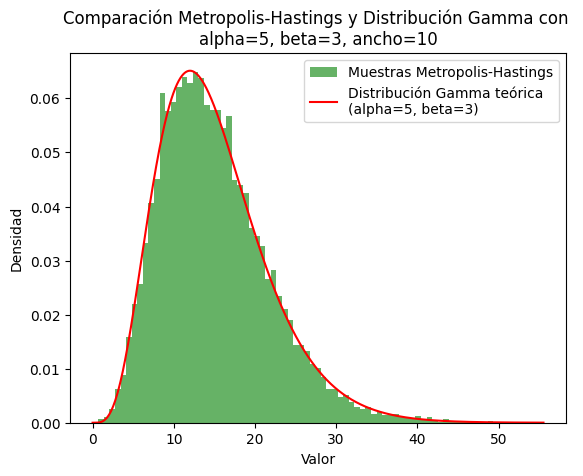

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Parámetros arbitrarios mayores a 1
alpha = 5  
beta = 3   
ancho1 = 10  

#Aquí estamos calculando la densidad de la distribución Gamma
def calcular_densidad_gamma(x, alpha, beta):
    return np.where(x > 0, x**(alpha - 1) * np.exp(-x / beta), 0)


#Aquí estamos aplicando el algoritmo de Metrópolis-Hastings
def generar_muestras_gamma(alpha, beta, N, ancho):
    x_actual = np.random.rand()  # Valor inicial aleatorio
    muestras = [x_actual]
    
    for _ in range(N):
        
        #Propuesta
        x_nueva = x_actual + np.random.normal(0, ancho)
        
        #Aceptación
        tasa = calcular_densidad_gamma(x_nueva, alpha, beta) / calcular_densidad_gamma(x_actual, alpha, beta)
        
        #Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x_actual = x_nueva  #Actualiza solo si se acepta la nueva muestra
        
        muestras.append(x_actual)
    
    return np.array(muestras)


N = 30000
samples = generar_muestras_gamma(alpha, beta, N, ancho1)

#Histograma
plt.hist(samples, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Densidad de la distribución Gamma teórica
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Comparación Metropolis-Hastings y Distribución Gamma con \nalpha={alpha}, beta={beta}, ancho={ancho1}")
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


2.2) Adicionalmente, use el método .fit para intentar “recuperar” los parámetros que eligió para 𝛼 y 𝛽.

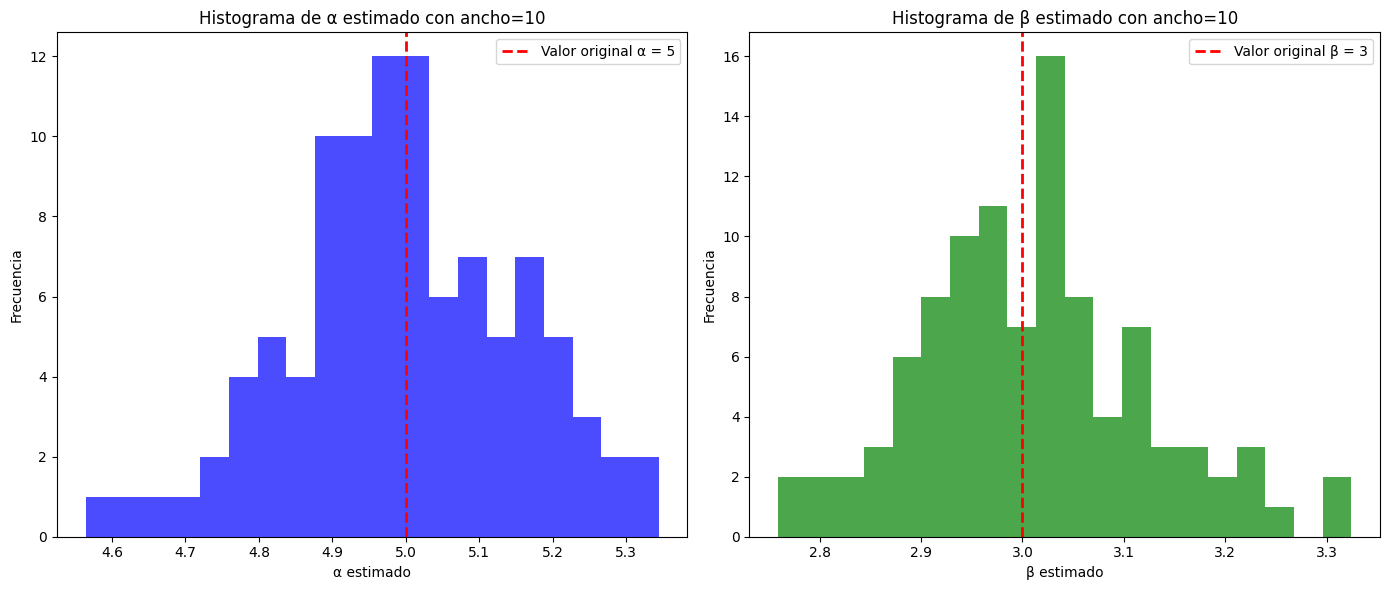

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_repeticiones = 100
num_muestras = 10000

alpha_estimados = []
beta_estimados = []


for _ in range(num_repeticiones):
    muestras = generar_muestras_gamma(alpha, beta, num_muestras, ancho1)
    alpha_estimado, loc, beta_estimado = stats.gamma.fit(muestras, floc=0)  
    alpha_estimados.append(alpha_estimado)
    beta_estimados.append(beta_estimado)


figura, ejes = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de α estimado
ejes[0].hist(alpha_estimados, bins=20, color='blue', alpha=0.7)
ejes[0].axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original α = {alpha}')
ejes[0].set_title(f'Histograma de α estimado con ancho={ancho1}')
ejes[0].set_xlabel('α estimado')
ejes[0].set_ylabel('Frecuencia')
ejes[0].legend()

#Histograma de β estimado
ejes[1].hist(beta_estimados, bins=20, color='green', alpha=0.7)
ejes[1].axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original β = {beta}')
ejes[1].set_title(f'Histograma de β estimado con ancho={ancho1}')
ejes[1].set_xlabel('β estimado')
ejes[1].set_ylabel('Frecuencia')
ejes[1].legend()

plt.tight_layout()
plt.show()


In [88]:
desviacion_alpha = np.std(alpha_estimados)
desviacion_beta = np.std(beta_estimados)

print(f"La desviación estándar de α para un ancho = {ancho1}, es {desviacion_alpha:.5f}")
print(f"La desviación estándar de β para un ancho = {ancho1}, es {desviacion_beta:.5f}")

print("\n")

mensaje_alpha = (
    f"Teniendo en cuenta un ancho de perturbación de {ancho1}, la desviación estándar de "
    f"las estimaciones de α es {desviacion_alpha:.5f}, lo que sugiere una dispersión moderada "
    "en los valores obtenidos.\n"
)

mensaje_beta = (
    f"Por otro lado, la desviación estándar de las estimaciones de β fue de {desviacion_beta:.5f}, "
    "lo que indica una mayor precisión en estas estimaciones en comparación con α.\n"
)

conclusion = (
    "En general, el ajuste del ancho permitió recuperar los parámetros con buena precisión "
    "gracias a la relativamente baja desviación estándar, particularmente en el caso de β, "
    "donde la variabilidad observada fue menor."
)

print(mensaje_alpha + mensaje_beta + conclusion)




La desviación estándar de α para un ancho = 10, es 0.15450
La desviación estándar de β para un ancho = 10, es 0.11246


Teniendo en cuenta un ancho de perturbación de 10, la desviación estándar de las estimaciones de α es 0.15450, lo que sugiere una dispersión moderada en los valores obtenidos.
Por otro lado, la desviación estándar de las estimaciones de β fue de 0.11246, lo que indica una mayor precisión en estas estimaciones en comparación con α.
En general, el ajuste del ancho permitió recuperar los parámetros con buena precisión gracias a la relativamente baja desviación estándar, particularmente en el caso de β, donde la variabilidad observada fue menor.


2.3) ¿Cambian estos histogramas si cambia el ancho de la distribución de perturbación del Metrópolis? ¿por qué?


Para responder a esa pregunta utilizaremos 2 anchos de distribución distintos al utilizado originalmente (Ancho=10), uno por debajo (Ancho=1) y uno por encima (Ancho = 20). 

Ancho = 1 (Ancho pode debajo del original):

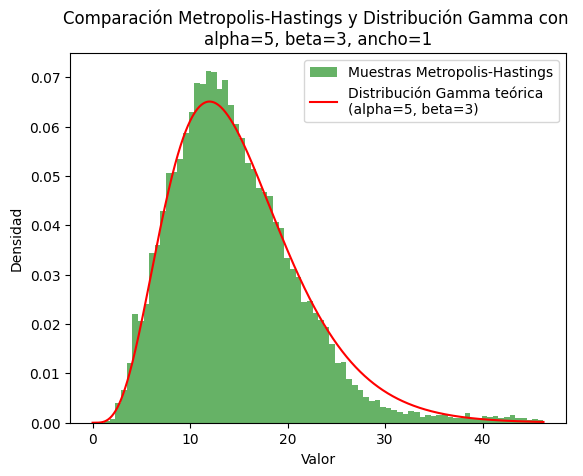

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Parámetros arbitrarios mayores a 1
alpha = 5  
beta = 3   
ancho_por_debajo= 1  


#Aquí estamos calculando la densidad de la distribución Gamma
def calcular_densidad_gamma(x, alpha, beta):
    return np.where(x > 0, x**(alpha - 1) * np.exp(-x / beta), 0)


#Aquí estamos aplicando el algoritmo de Metrópolis-Hastings
def generar_muestras_gamma(alpha, beta, N, ancho):
    x_actual = np.random.rand()  # Valor inicial aleatorio
    muestras = [x_actual]
    
    for _ in range(N):
        
        #Propuesta
        x_nueva = x_actual + np.random.normal(0, ancho)
        
        #Aceptación
        tasa = calcular_densidad_gamma(x_nueva, alpha, beta) / calcular_densidad_gamma(x_actual, alpha, beta)
        
        #Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x_actual = x_nueva  #Actualiza solo si se acepta la nueva muestra
        
        muestras.append(x_actual)
    
    return np.array(muestras)


N = 30000
samples = generar_muestras_gamma(alpha, beta, N, ancho_por_debajo)

#Histograma
plt.hist(samples, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Densidad de la distribución Gamma teórica
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Comparación Metropolis-Hastings y Distribución Gamma con \nalpha={alpha}, beta={beta}, ancho={ancho_por_debajo}")
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


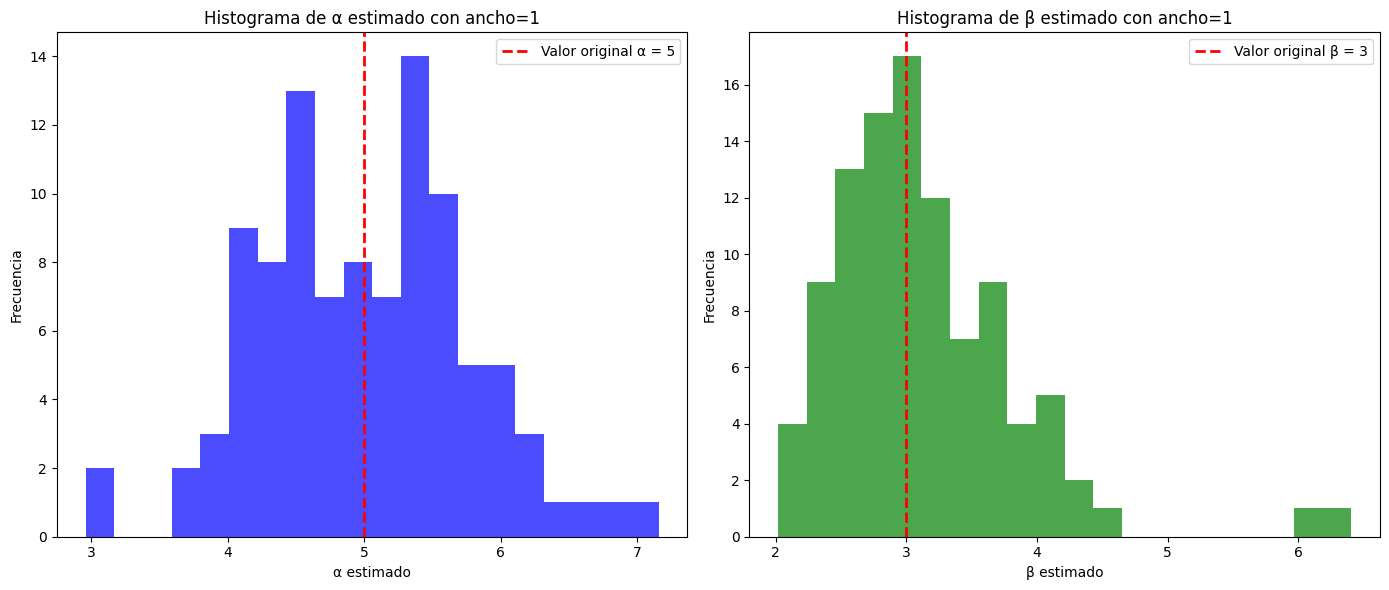

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_repeticiones = 100
num_muestras = 10000

alpha_estimados_por_debajo = []
beta_estimados_por_debajo = []



for _ in range(num_repeticiones):
    muestras = generar_muestras_gamma(alpha, beta, num_muestras, ancho_por_debajo)
    alpha_estimado, loc, beta_estimado = stats.gamma.fit(muestras, floc=0)  
    alpha_estimados_por_debajo.append(alpha_estimado)
    beta_estimados_por_debajo.append(beta_estimado)


figura, ejes = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de α estimado
ejes[0].hist(alpha_estimados_por_debajo, bins=20, color='blue', alpha=0.7)
ejes[0].axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original α = {alpha}')
ejes[0].set_title(f'Histograma de α estimado con ancho={ancho_por_debajo}')
ejes[0].set_xlabel('α estimado')
ejes[0].set_ylabel('Frecuencia')
ejes[0].legend()

#Histograma de β estimado
ejes[1].hist(beta_estimados_por_debajo, bins=20, color='green', alpha=0.7)
ejes[1].axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original β = {beta}')
ejes[1].set_title(f'Histograma de β estimado con ancho={ancho_por_debajo}')
ejes[1].set_xlabel('β estimado')
ejes[1].set_ylabel('Frecuencia')
ejes[1].legend()

plt.tight_layout()
plt.show()

Ancho = 20 (Ancho pode encima del original):

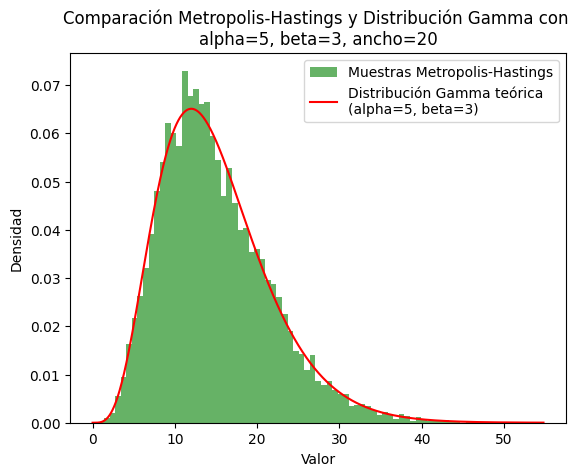

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Parámetros arbitrarios mayores a 1
alpha = 5  
beta = 3   
ancho_por_encima= 20  


#Aquí estamos calculando la densidad de la distribución Gamma
def calcular_densidad_gamma(x, alpha, beta):
    return np.where(x > 0, x**(alpha - 1) * np.exp(-x / beta), 0)


#Aquí estamos aplicando el algoritmo de Metrópolis-Hastings
def generar_muestras_gamma(alpha, beta, N, ancho):
    x_actual = np.random.rand()  # Valor inicial aleatorio
    muestras = [x_actual]
    
    for _ in range(N):
        
        #Propuesta
        x_nueva = x_actual + np.random.normal(0, ancho)
        
        #Aceptación
        tasa = calcular_densidad_gamma(x_nueva, alpha, beta) / calcular_densidad_gamma(x_actual, alpha, beta)
        
        #Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x_actual = x_nueva  #Actualiza solo si se acepta la nueva muestra
        
        muestras.append(x_actual)
    
    return np.array(muestras)


N = 30000
samples = generar_muestras_gamma(alpha, beta, N, ancho_por_encima)

#Histograma
plt.hist(samples, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Densidad de la distribución Gamma teórica
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Comparación Metropolis-Hastings y Distribución Gamma con \nalpha={alpha}, beta={beta}, ancho={ancho_por_encima}")
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


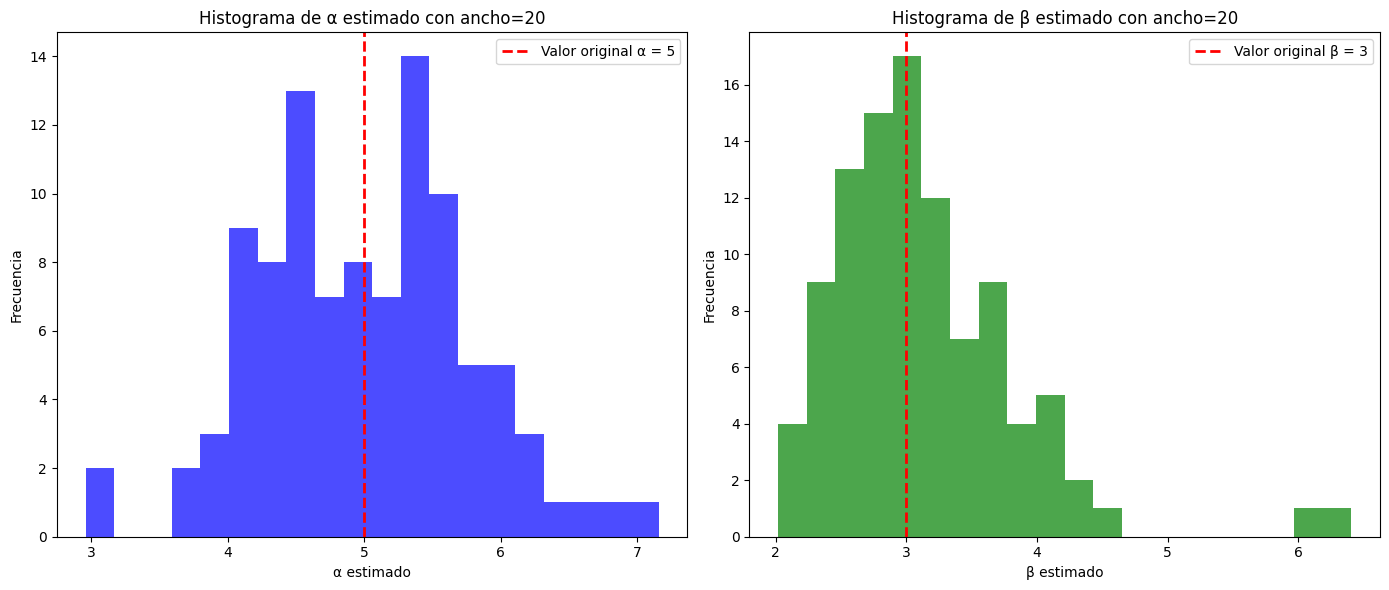

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_repeticiones = 100
num_muestras = 10000

alpha_estimados_por_encima = []
beta_estimados_por_encima = []



for _ in range(num_repeticiones):
    muestras = generar_muestras_gamma(alpha, beta, num_muestras, ancho_por_debajo)
    alpha_estimado, loc, beta_estimado = stats.gamma.fit(muestras, floc=0)  
    alpha_estimados_por_encima.append(alpha_estimado)
    beta_estimados_por_encima.append(beta_estimado)


figura, ejes = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de α estimado
ejes[0].hist(alpha_estimados_por_debajo, bins=20, color='blue', alpha=0.7)
ejes[0].axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original α = {alpha}')
ejes[0].set_title(f'Histograma de α estimado con ancho={ancho_por_encima}')
ejes[0].set_xlabel('α estimado')
ejes[0].set_ylabel('Frecuencia')
ejes[0].legend()

#Histograma de β estimado
ejes[1].hist(beta_estimados_por_debajo, bins=20, color='green', alpha=0.7)
ejes[1].axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original β = {beta}')
ejes[1].set_title(f'Histograma de β estimado con ancho={ancho_por_encima}')
ejes[1].set_xlabel('β estimado')
ejes[1].set_ylabel('Frecuencia')
ejes[1].legend()

plt.tight_layout()
plt.show()

In [101]:

for nombre_variable, desviacion in [
    ("alfa", desviacion_alpha), 
    ("beta", desviacion_beta)
]:
    print(f"La desviación estándar de {nombre_variable} para un ancho={ancho1} es {desviacion}")

print("\n")

desviacion_alpha2, desviacion_beta2 = np.std(alpha_estimados_por_debajo), np.std(beta_estimados_por_debajo)
for nombre_variable, desviacion, ancho in [
    ("alfa", desviacion_alpha2, ancho_por_debajo), 
    ("beta", desviacion_beta2, ancho_por_debajo)
]:
    print(f"La desviación estándar de {nombre_variable} para un ancho={ancho} es {desviacion}")

print("\n")

desviacion_alpha3, desviacion_beta3 = np.std(alpha_estimados_por_encima), np.std(beta_estimados_por_encima)
for nombre_variable, desviacion, ancho in [
    ("alfa", desviacion_alpha3, ancho_por_encima), 
    ("beta", desviacion_beta3, ancho_por_encima)
]:
    print(f"La desviación estándar de {nombre_variable} para un ancho={ancho} es {desviacion}")
    



La desviación estándar de alfa para un ancho=10 es 0.15450245056712172
La desviación estándar de beta para un ancho=10 es 0.112455225892077


La desviación estándar de alfa para un ancho=1 es 0.7743515064515502
La desviación estándar de beta para un ancho=1 es 0.7017684226451334


La desviación estándar de alfa para un ancho=20 es 0.5810353021804618
La desviación estándar de beta para un ancho=20 es 0.4890745731843423


Las desviaciones estándar obtenidas muestran que un ancho de perturbación igual a 10 proporciona los resultados más consistentes, ya que minimiza la dispersión de los valores estimados tanto para alpha como para beta. En comparación, un ancho de 1 genera desviaciones más altas, lo que sugiere una mayor variabilidad en las estimaciones. Por su parte, el ancho de 30 también produce desviaciones elevadas, aunque no tan pronunciadas como las del ancho de 1.

El tamaño del ancho de perturbación influye directamente en la precisión de las estimaciones, ya que regula la magnitud de los saltos propuestos por el algoritmo de Metropolis-Hastings. Un ancho pequeño (por ejemplo, 1) hace que el algoritmo realice saltos cortos y frecuentes, ralentizando la exploración del espacio de parámetros y, en consecuencia, incrementando la variabilidad de las estimaciones. En contraste, un ancho grande (como 30) ocasiona que se propongan saltos muy amplios, reduciendo la tasa de aceptación y aumentando la dispersión.

Al seleccionar un ancho intermedio, como el de 10, se logra un equilibrio entre la exploración y la aceptación de propuestas. Este tamaño de salto permite una cobertura más amplia del espacio de parámetros sin comprometer la tasa de aceptación, lo que da lugar a estimaciones más estables y precisas de alpha y beta. Así, se observa que el ajuste adecuado del ancho es crucial para obtener resultados que representen con mayor fidelidad los parámetros buscados.

                                            BONO PUNTO 2: ¿Cambia esto si usa un 𝑁 mayor o menor?

Para esto, fijamos el ancho en 10 y utilizaremos dos valores para N respecto al valor original (N=10 000), uno por debajo (N=1000) y uno por encima (N=20.000). 

N=1000:

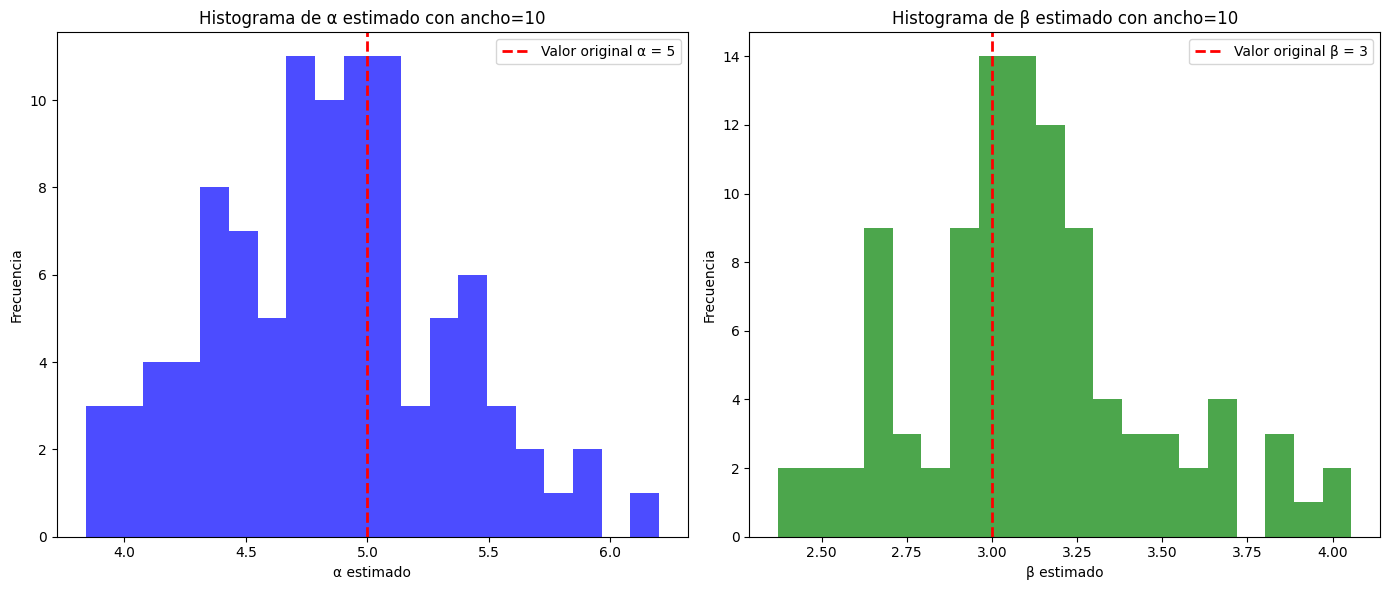

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_repeticiones = 100
num_muestras = 1000

alpha_estimados_por_debajo_N = []
beta_estimados_por_debajo_N = []


for _ in range(num_repeticiones):
    muestras = generar_muestras_gamma(alpha, beta, num_muestras, ancho1)
    alpha_estimado, loc, beta_estimado = stats.gamma.fit(muestras, floc=0)  
    alpha_estimados_por_debajo_N.append(alpha_estimado)
    beta_estimados_por_debajo_N.append(beta_estimado)


figura, ejes = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de α estimado
ejes[0].hist(alpha_estimados_por_debajo_N, bins=20, color='blue', alpha=0.7)
ejes[0].axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original α = {alpha}')
ejes[0].set_title(f'Histograma de α estimado con ancho={ancho1}')
ejes[0].set_xlabel('α estimado')
ejes[0].set_ylabel('Frecuencia')
ejes[0].legend()

#Histograma de β estimado
ejes[1].hist(beta_estimados_por_debajo_N, bins=20, color='green', alpha=0.7)
ejes[1].axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original β = {beta}')
ejes[1].set_title(f'Histograma de β estimado con ancho={ancho1}')
ejes[1].set_xlabel('β estimado')
ejes[1].set_ylabel('Frecuencia')
ejes[1].legend()

plt.tight_layout()
plt.show()


N=20000:

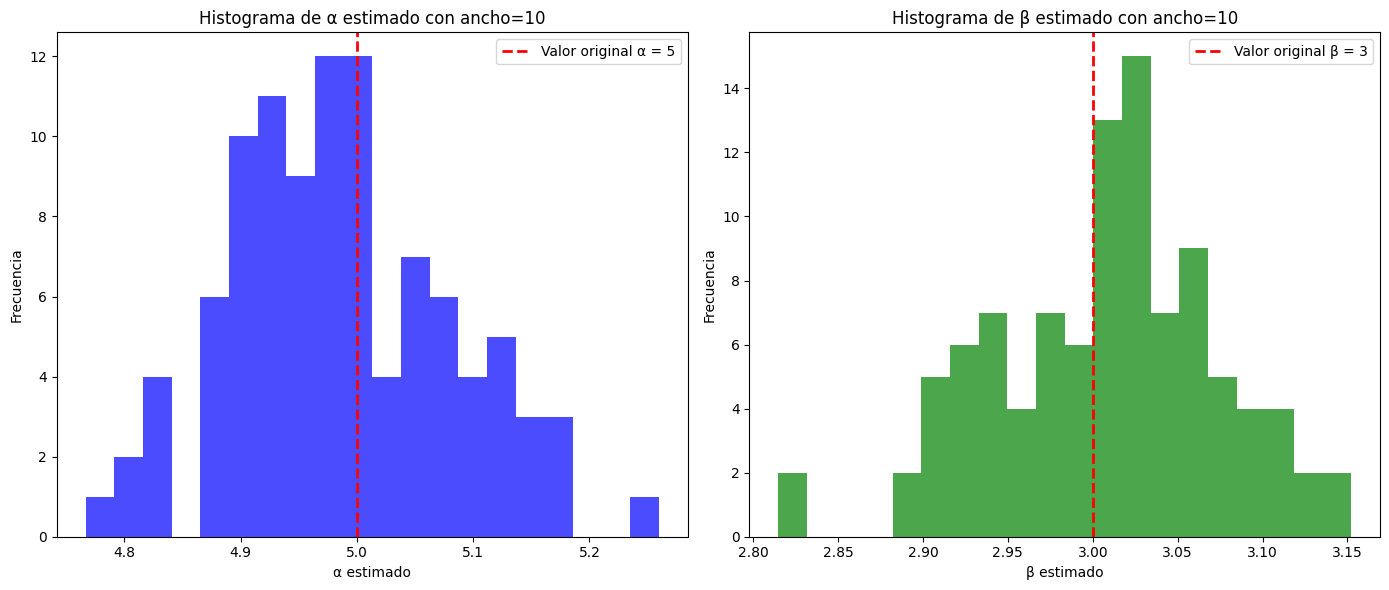

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num_repeticiones = 100
num_muestras = 20000

alpha_estimados_por_encima_N = []
beta_estimados_por_encima_N = []


for _ in range(num_repeticiones):
    muestras = generar_muestras_gamma(alpha, beta, num_muestras, ancho1)
    alpha_estimado, loc, beta_estimado = stats.gamma.fit(muestras, floc=0)  
    alpha_estimados_por_encima_N.append(alpha_estimado)
    beta_estimados_por_encima_N.append(beta_estimado)


figura, ejes = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de α estimado
ejes[0].hist(alpha_estimados_por_encima_N, bins=20, color='blue', alpha=0.7)
ejes[0].axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original α = {alpha}')
ejes[0].set_title(f'Histograma de α estimado con ancho={ancho1}')
ejes[0].set_xlabel('α estimado')
ejes[0].set_ylabel('Frecuencia')
ejes[0].legend()

#Histograma de β estimado
ejes[1].hist(beta_estimados_por_encima_N, bins=20, color='green', alpha=0.7)
ejes[1].axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original β = {beta}')
ejes[1].set_title(f'Histograma de β estimado con ancho={ancho1}')
ejes[1].set_xlabel('β estimado')
ejes[1].set_ylabel('Frecuencia')
ejes[1].legend()

plt.tight_layout()
plt.show()


In [116]:
ancho1=10000

for nombre_variable, desviacion in [
    ("alfa", desviacion_alpha), 
    ("beta", desviacion_beta)
]:
    print(f"La desviación estándar de {nombre_variable} para un 𝑁 = {ancho1} números aleatorios es {desviacion}")

print("\n")


desviacion_alpha2, desviacion_beta2 = np.std(alpha_estimados_por_debajo_N), np.std(beta_estimados_por_debajo_N)
for nombre_variable, desviacion, ancho in [
    ("alfa", desviacion_alpha2, ancho1), 
    ("beta", desviacion_beta2, ancho1)
]:
    print(f"La desviación estándar de {nombre_variable} para un 𝑁 = {1000} números aleatorios es {desviacion}")

print("\n")


desviacion_alpha3, desviacion_beta3 = np.std(alpha_estimados_por_encima_N), np.std(beta_estimados_por_encima_N)
for nombre_variable, desviacion, ancho in [
    ("alfa", desviacion_alpha3, ancho1), 
    ("beta", desviacion_beta3, ancho1)
]:
    print(f"La desviación estándar de {nombre_variable} para un 𝑁 = {20000} números aleatorios es {desviacion}")
    

La desviación estándar de alfa para un 𝑁 = 10000 números aleatorios es 0.15450245056712172
La desviación estándar de beta para un 𝑁 = 10000 números aleatorios es 0.112455225892077


La desviación estándar de alfa para un 𝑁 = 1000 números aleatorios es 0.48518276352407486
La desviación estándar de beta para un 𝑁 = 1000 números aleatorios es 0.3439762783620788


La desviación estándar de alfa para un 𝑁 = 20000 números aleatorios es 0.09474609855231661
La desviación estándar de beta para un 𝑁 = 20000 números aleatorios es 0.06609174104618344


La relación entre el número de muestras N y la desviación estándar de las estimaciones de alpha y beta es inversamente proporcional, lo que significa que a medida que N aumenta, la dispersión de las estimaciones disminuye. Esto se debe a que un tamaño de muestra más grande proporciona una mejor representación de la distribución subyacente, permitiendo que los estimadores converjan con mayor precisión hacia los valores verdaderos. Por esta razón, las desviaciones estándar son más altas con N = 1,000 y disminuyen a medida que N crece, alcanzando sus valores mínimos con N = 20,000.

Con un N pequeño, las cadenas de Metrópolis-Hastings tienen una capacidad limitada para explorar adecuadamente el espacio de parámetros, lo que lleva a un aumento en la varianza de las estimaciones debido a una cobertura insuficiente de la distribución objetivo. Por otro lado, un N grande (como 20,000) permite una mejor convergencia y cobertura del espacio de parámetros, reduciendo el error del estimador y, en consecuencia, las desviaciones estándar de alpha y beta.

En conclusión, al aumentar N, se logra un balance óptimo entre precisión y variabilidad en las estimaciones. La menor desviación estándar observada con N = 20,000 sugiere que, a pesar de la reducción asintótica del error, un mayor número de muestras siempre contribuirá a una menor dispersión en las estimaciones, mejorando así la fiabilidad de los parámetros estimados.

                                                                PUNTO 3 - con bono

MovieWriter imagemagick unavailable; using Pillow instead.


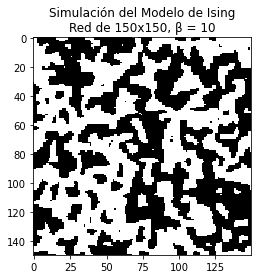

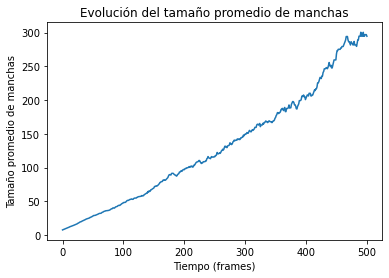

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import label

N = 150 
J = 0.2
beta = 10
frames = 500
it = 400

def iniciar_sist(N):
    sistema = np.random.choice([-1, 1], size=(N, N))
    return sistema

sistema = iniciar_sist(N)

def energia_punto(sistema, i, j, N):
    vecinos = [(i + 1) % N, (i - 1) % N, (j + 1) % N, (j - 1) % N]
    energia = -J * sistema[i, j] * (sistema[vecinos[0], j] + sistema[vecinos[1], j] + sistema[i, vecinos[2]] + sistema[i, vecinos[3]])
    return energia

def actualizar_sist(N, beta):
    global sistema
    x, y = np.random.randint(0, N, size=2)
    
    nuevo_sistema = sistema.copy()
    nuevo_sistema[x, y] *= -1

    E_anterior = sum(energia_punto(sistema, x, y, N) for _ in range(5))
    E_nueva = sum(energia_punto(nuevo_sistema, x, y, N) for _ in range(5))

    delta_energia = E_nueva - E_anterior

    if delta_energia <= 0 or np.random.rand() < np.exp(-delta_energia * beta):
        sistema = nuevo_sistema

    return sistema

def tamaño_promedio_manchas(sistema):
    labeled_plus, num_plus = label(sistema == 1)
    labeled_minus, num_minus = label(sistema == -1)
    
    tamaños_plus = [np.sum(labeled_plus == i) for i in range(1, num_plus + 1)]
    tamaños_minus = [np.sum(labeled_minus == i) for i in range(1, num_minus + 1)]
    
    if tamaños_plus and tamaños_minus:
        promedio_plus = np.mean(tamaños_plus)
        promedio_minus = np.mean(tamaños_minus)
        return (promedio_plus + promedio_minus) / 2
    elif tamaños_plus:
        return np.mean(tamaños_plus)
    elif tamaños_minus:
        return np.mean(tamaños_minus)
    else:
        return 0

def actualizar_imagen(frame, imagen, N, beta, it, promedios_tamanos):
    global sistema
    for _ in range(it):
        sistema = actualizar_sist(N, beta)
    
    promedio_tamano = tamaño_promedio_manchas(sistema)
    promedios_tamanos.append(promedio_tamano)
    
    imagen.set_array(sistema)
    return [imagen]

def simular_ising(N, beta, frames, it):
    sistema = iniciar_sist(N)
    
    fig, ax = plt.subplots()
    imagen = ax.imshow(sistema, cmap='gray', interpolation='nearest')
    ax.set_title(f"Simulación del Modelo de Ising\nRed de {N}x{N}, β = {beta}")
    
    promedios_tamaños = [] 
    
    anim = animation.FuncAnimation(fig, actualizar_imagen, frames=frames, fargs=(imagen, N, beta, it, promedios_tamaños), interval=50)
    anim.save('3.Animación ising.gif', writer='imagemagick', fps=10)
    plt.show()
    
    plt.figure()
    plt.plot(range(len(promedios_tamaños)), promedios_tamaños)
    plt.xlabel('Tiempo (frames)')
    plt.ylabel('Tamaño promedio de manchas')
    plt.title('Evolución del tamaño promedio de manchas')
    plt.show()

simular_ising(N, beta, frames, it)

                                                                PUNTO 4

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import random

s = "GTCTTAAAAGGCGCGGGTAAGGCCTTGTTCAACACTTGTCCCGTA"

atoms = list("ACGT")
chars = list("ACGT")

F = pd.DataFrame(np.zeros((4, 4), dtype=int), index=atoms, columns=chars)

for i in range(len(s) - 1):
    F.loc[s[i], s[i + 1]] += 1

print("Tabla de frecuencias F:")
print(F,"\n")


P = F / F.sum(axis=1).values[:, None] #Normalización

print("Matriz de probabilidades P: ")
print(P,"\n")

cadena = "ACG"
n_letras = 50

for _ in range(n_letras):
    ultima_letra = cadena[-1]
    nueva_letra = np.random.choice(atoms, p=P.loc[ultima_letra])
    cadena += nueva_letra

print("Cadena generada: ", cadena)

Tabla de frecuencias F:
   A  C  G  T
A  5  2  2  0
C  2  3  3  3
G  0  3  4  5
T  3  3  2  4 

Matriz de probabilidades P: 
          A         C         G         T
A  0.555556  0.222222  0.222222  0.000000
C  0.181818  0.272727  0.272727  0.272727
G  0.000000  0.250000  0.333333  0.416667
T  0.250000  0.250000  0.166667  0.333333 

Cadena generada:  ACGTTAAAAGTGGCGCTGGCCAAAAAGTTGCTCACTGGTTAAAACCCCGTTAG


4.1) Limpiar datos

Libro escogido: Frankenstein

In [2]:
with open('Frankenstein_MS.txt', 'r', encoding='utf-8') as file:
    s = file.read()

def limpiar_texto(s):
    s  = s.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n")
    s = re.sub(r"[^a-zA-Z\s]", "", s)
    s = re.sub(r"\s+", " ", s)
    s = s.lower() 
    return s

s=limpiar_texto(s)

4.2) Entrenamiento y predicción

In [3]:
def construir_modelo(texto, n):
    modelo = defaultdict(lambda: defaultdict(int))
    
    for i in range(len(texto) - n):
        n_grama = texto[i:i+n]           
        siguiente_caracter = texto[i+n] 
        modelo[n_grama][siguiente_caracter] += 1
    
    return modelo

def convertir_a_dataframe(modelo):
    df = pd.DataFrame.from_dict({k: dict(v) for k, v in modelo.items()}, orient='index').fillna(0)
    return df

n = int(np.random.randint(1, 50, 1))

modelo = construir_modelo(s, n)
df_frecuencias = convertir_a_dataframe(modelo)

def entrenar_ngramas(texto, n=3):
    frecuencias = defaultdict(lambda: defaultdict(int))
    for i in range(len(texto) - n):
        ngrama = texto[i:i+n]
        siguiente_caracter = texto[i+n]
        frecuencias[ngrama][siguiente_caracter] += 1
    
    probabilidades = {}
    for ngrama, siguiente_caracteres in frecuencias.items():
        total = sum(siguiente_caracteres.values())
        probabilidades[ngrama] = {char: count/total for char, count in siguiente_caracteres.items()}
    return probabilidades

modelo_ngramas = entrenar_ngramas(s, n=3)

def generar_texto(modelo, longitud=1500, n=3):
    ngramas_inicio = [ngrama for ngrama in modelo if ngrama.startswith('\n')]
    ngrama_actual = random.choice(ngramas_inicio) if ngramas_inicio else random.choice(list(modelo.keys()))
    
    texto_generado = ngrama_actual
    
    for _ in range(longitud - n):
        siguiente_char = np.random.choice(
            list(modelo[ngrama_actual].keys()), 
            p=list(modelo[ngrama_actual].values())
        )
        texto_generado += siguiente_char
        ngrama_actual = texto_generado[-n:]
    
    return texto_generado

texto_nuevo = generar_texto(modelo_ngramas, longitud=1500)
print(texto_nuevo)
print("Longitud del texto: ", len(texto_nuevo))

shut thung whirl can i cretly werer you a virthe but younded metiny sease tured of yourse be the eyes not wand m kremaind to that was an i deaturn to their becatificulpable wave approver i convery and soundere in frose lay am rived are ince first fore was the waites of rest was life what joyment auth i remore would be had nothed may the this and to did ange with themindeepend cated who with was on myseld on saw be again sonsiden blook asselfish dreathe human had and destrue olds and mimication the cake a she wife reply tale would andigns hered he lege the convery vastence of they againt of pleavourning the her had be duresultity the imagnificably the to be fathe prom my sin he neceivent curing thing ear and it walked that months lastenceived not works of clous i leart we might to me beling its arted follow to repose innot diss of than was pers here snow the procuritions and althought ter brough its werer him through the companimaliveress which in to genessed of that hous and happrovere

4.3) Análisis

In [12]:
n_valores = range(1, 8)
textos_generados = {}

for n in n_valores:
    modelo_ngramas = entrenar_ngramas(s, n=n)
    texto_generado = generar_texto(modelo_ngramas, longitud=1500, n=n)
    textos_generados[n] = texto_generado
    print(f"Texto generado con n = {n}:\n", texto_generado, "\n")

Texto generado con n = 1:
 kll icheacrd the buat tingre urondin thitone rar dallary by pem tht mine pand heathesice cinicef ared shevand is mmofout ra antan wencoucliend mef alurtht mo a y bemyore mbererusnon mpe otoventougl and waulimed wendene teld f hen ly d tare meath ve on re why terewhewove s ftletht mudedg f d w fan ablivereamemyomestas dener atime aidshi errdindlfatituneme cis s qus by we s cthe wlorgit bldsesucouctar ad te oulstisst prore ay nis tead ilopok smei m manona t my am thire f trveveang ove calo etehi atedloin thtotht f ithrertoathaiono ce t s i brerse ersunise imire cok s ppthedurtou ain ha ys isutouisto ices endexads asieans che fan hthert ime d bromatoo wignt ter thertthe d owho waseten eanili wanorvitly te myed the lde us urastouralo by d asughoutise hme gricas s thereles hor ng y t ty out nds tases rth hed he wexplursppow mely s wen bemis fof ptistoude w ilighand wakimilecaprand lallisy allethonondeltavextherresenevite bey g erkn ce sclist ronet fen lest tofube 

In [13]:
with open('words_alpha.txt', 'r') as file:
    palabras_ingles = set(file.read().splitlines())

def porcentaje_palabras_reconocidas(texto, palabras_ingles):
    palabras_generadas = re.findall(r'\b\w+\b', texto)  
    palabras_validas = [palabra for palabra in palabras_generadas if palabra in palabras_ingles]
    return len(palabras_validas) / len(palabras_generadas) * 100 if palabras_generadas else 0

resultados_porcentajes = {}
for n, texto in textos_generados.items():
    porcentaje = porcentaje_palabras_reconocidas(texto, palabras_ingles)
    resultados_porcentajes[n] = porcentaje
    print(f"Porcentaje de palabras en inglés para n = {n}: {porcentaje:.2f}%")

Porcentaje de palabras en inglés para n = 1: 47.51%
Porcentaje de palabras en inglés para n = 2: 62.32%
Porcentaje de palabras en inglés para n = 3: 68.98%
Porcentaje de palabras en inglés para n = 4: 90.32%
Porcentaje de palabras en inglés para n = 5: 95.59%
Porcentaje de palabras en inglés para n = 6: 98.93%
Porcentaje de palabras en inglés para n = 7: 100.00%


Bono del punto 4.3

1) Elección de un libro o género del libro distinto

In [16]:
libros = {"novela": "The Great Gatsby_SF.txt", "poesia": "Poems.txt","ensayo": "Essays.txt"}

textos_generados_por_libro = {}

for genero, archivo in libros.items():
    with open(archivo, 'r', encoding='utf-8') as file:
        texto_libro = file.read()
    
    texto_libro = limpiar_texto(texto_libro)
    
    for n in n_valores:
        modelo_ngramas = entrenar_ngramas(texto_libro, n=n)
        texto_generado = generar_texto(modelo_ngramas, longitud=1500, n=n)
        textos_generados_por_libro[(genero, n)] = texto_generado

resultados_porcentajes_por_libro = {}

for (genero, n), texto in textos_generados_por_libro.items():
    porcentaje = porcentaje_palabras_reconocidas(texto, palabras_ingles)
    resultados_porcentajes_por_libro[(genero, n)] = porcentaje
    print(f"Porcentaje de palabras en inglés para el libro de {genero} con n = {n}: {porcentaje:.2f}%")

Porcentaje de palabras en inglés para el libro de novela con n = 1: 49.30%
Porcentaje de palabras en inglés para el libro de novela con n = 2: 60.92%
Porcentaje de palabras en inglés para el libro de novela con n = 3: 72.54%
Porcentaje de palabras en inglés para el libro de novela con n = 4: 88.57%
Porcentaje de palabras en inglés para el libro de novela con n = 5: 96.09%
Porcentaje de palabras en inglés para el libro de novela con n = 6: 97.15%
Porcentaje de palabras en inglés para el libro de novela con n = 7: 98.28%
Porcentaje de palabras en inglés para el libro de poesia con n = 1: 44.68%
Porcentaje de palabras en inglés para el libro de poesia con n = 2: 62.06%
Porcentaje de palabras en inglés para el libro de poesia con n = 3: 76.24%
Porcentaje de palabras en inglés para el libro de poesia con n = 4: 92.59%
Porcentaje de palabras en inglés para el libro de poesia con n = 5: 96.84%
Porcentaje de palabras en inglés para el libro de poesia con n = 6: 98.25%
Porcentaje de palabras en

A partir de estos resultados nos damos cuenta de que el porcentaje de palabras generadas que, efectivamente, son palabras del inglés no depende ni del libro usado para entenar el modelo ni del género del libro puesto que se utilizó otra novela y líbros de poesía y ensayos.
Esto se evidencia debido a que el porcentaje de palabras en inglés para n=7 es bastante alto (superior al 97%) en los tres casos indistintamente.

2. Elección de un libro en otro idioma

In [15]:
with open('palabras_español.txt', 'r') as file:
    palabras_español = set(file.read().splitlines())

with open('Don Quijote.txt', 'r', encoding='utf-8') as file:
    texto_libro = file.read()

texto_libro = limpiar_texto(texto_libro)

for n in n_valores:
    modelo_ngramas = entrenar_ngramas(texto_libro, n=n)
    texto_generado = generar_texto(modelo_ngramas, longitud=1500, n=n)
    textos_generados[n] = texto_generado

resultados_porcentajes = {}
for n, texto in textos_generados.items():
    porcentaje = porcentaje_palabras_reconocidas(texto, palabras_español)
    resultados_porcentajes[n] = porcentaje
    print(f"Porcentaje de palabras en español para n = {n}: {porcentaje:.2f}%")

Porcentaje de palabras en español para n = 1: 43.94%
Porcentaje de palabras en español para n = 2: 60.88%
Porcentaje de palabras en español para n = 3: 58.27%
Porcentaje de palabras en español para n = 4: 75.43%
Porcentaje de palabras en español para n = 5: 79.23%
Porcentaje de palabras en español para n = 6: 81.57%
Porcentaje de palabras en español para n = 7: 80.00%


Para el caso en el que cambiamos el idioma, nos damos cuenta de que el porcentaje de palabras generadas que, efectivamente, son palabras del español baja significativamente e incluso tiene un comportamiento llamativo puesto que para un mayor valor de n da menos acertado. Esto se puede deber a que el archivo de palabras en español contiene menos palabras que el archivo de palabras en inglés. Pero de manera más importante, hay que tener en cuenta que en español se usa la acentuación (que en inglés no existe) y el código diseñado hace caso omiso a este tipo de caracteres, por lo tanto no es un código apropiado para lenguas en las que se usan acentuaciones como las tildes o letras como la ñ.

3. ¿Qué pasos habría que seguir para que este modelo pudiera mantener una conversación, o producir frases gramaticalmente correctas?

Para responder a esta pregunta se nos ocurre que podríamos aumentar el tamaño de n o usar un contexto más largo. Otra opción, que ya va un poco más allá, sería implementar una red neuronal puesto que es un modelo más avanzado que es capaz de aprender patrones más complejos del lenguaje y mantener información de contextos mucho más largos. Para esto la red tendría que entrenarse con las normas gramaticales (establecer las reglas en el modelo) y con ejemplos de diálogo para que luego pueda replicarlos de manera acertada. 

                                                                PUNTO 5 

5.1) Sistema determinista...

Tiempo de estado estable para U: 2.1021021021021022 días
Tiempo de estado estable para Np: 27.50750750750751 días
Tiempo de estado estable para Pu: 21.26126126126126 días


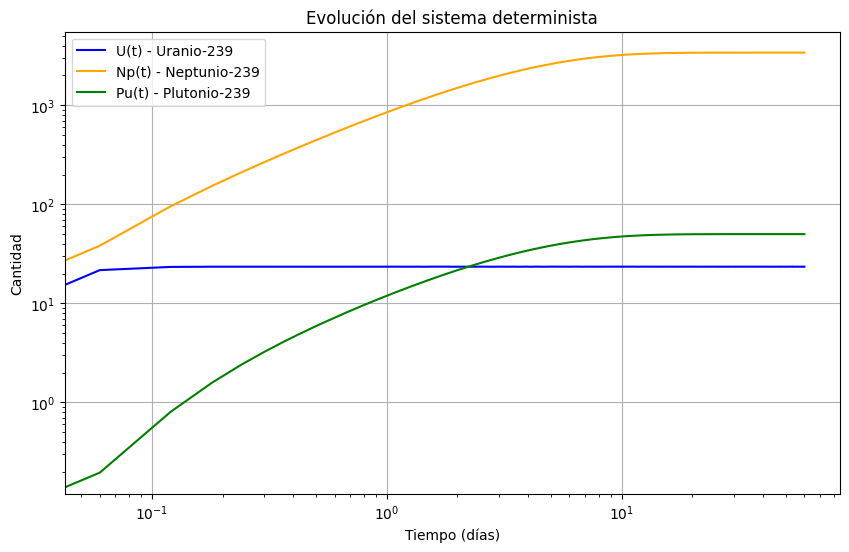

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Parámetros (En los comentarios explicamos a qué corresponde cada variable):

A = 1000  #Producción diaria de U239
B = 20    #Tasa de extracción de Pu239
lambda_U = np.log(2) / (23.4 / 1440)  #Constante de decaimiento de U239 en minutos
lambda_Np = np.log(2) / 2.36  #Constante de decaimiento de Np239 en días


def sistema_determinista(t, y):
    U, Np, Pu = y
    dU_dt = A - lambda_U * U
    dNp_dt = lambda_U * U - lambda_Np * Np
    dPu_dt = lambda_Np * Np - B * Pu
    return [dU_dt, dNp_dt, dPu_dt]


y0 = [0, 0, 0]

t_span = (0, 60)
t_eval = np.linspace(0, 60, 1000)  #Evaluamos en 1000 puntos dentro del intervalo

sol = solve_ivp(sistema_determinista, t_span, y0, t_eval=t_eval, method='RK45')


time = sol.t
U_sol, Np_sol, Pu_sol = sol.y


plt.figure(figsize=(10, 6))
plt.plot(time, U_sol, label="U(t) - Uranio-239", color='blue')
plt.plot(time, Np_sol, label="Np(t) - Neptunio-239", color='orange')
plt.plot(time, Pu_sol, label="Pu(t) - Plutonio-239", color='green')
plt.xlabel("Tiempo (días)")
plt.ylabel("Cantidad")
plt.title("Evolución del sistema determinista")
plt.legend()
plt.grid(True)
#plt.show()


delta_U = np.abs(np.diff(U_sol))
delta_Np = np.abs(np.diff(Np_sol))
delta_Pu = np.abs(np.diff(Pu_sol))

#Vamos a utilizar un método similar al utilizado en el taller 3: Threshold o Umbral, en este caso, la derivada o pendiente de cada elemento
#Para determinar cuándo se alcanza un  estado estable (cuando la pendiente sea muy pequeña/Constante):

tolerancia = 1e-3  # Definir una tolerancia para el cambio entre pasos
estado_estable_U = np.where(delta_U < tolerancia)[0][0] if np.any(delta_U < tolerancia) else None
estado_estable_Np = np.where(delta_Np < tolerancia)[0][0] if np.any(delta_Np < tolerancia) else None
estado_estable_Pu = np.where(delta_Pu < tolerancia)[0][0] if np.any(delta_Pu < tolerancia) else None


print(f"Tiempo de estado estable para U: {time[estado_estable_U]} días" if estado_estable_U is not None else "U no alcanza estado estable.")
print(f"Tiempo de estado estable para Np: {time[estado_estable_Np]} días" if estado_estable_Np is not None else "Np no alcanza estado estable.")
print(f"Tiempo de estado estable para Pu: {time[estado_estable_Pu]} días" if estado_estable_Pu is not None else "Pu no alcanza estado estable.")


#Graficamos en este escala para poder ver con mayor claridad el tiempo que le toma llegar al estado estable, por recomendación del profesor
plt.xscale("log")
plt.yscale("log")

5.2) Sistema estocástico...

a) Simule hasta 𝑡 = 30 días y grafique la solución estocástica y la solución determinista.

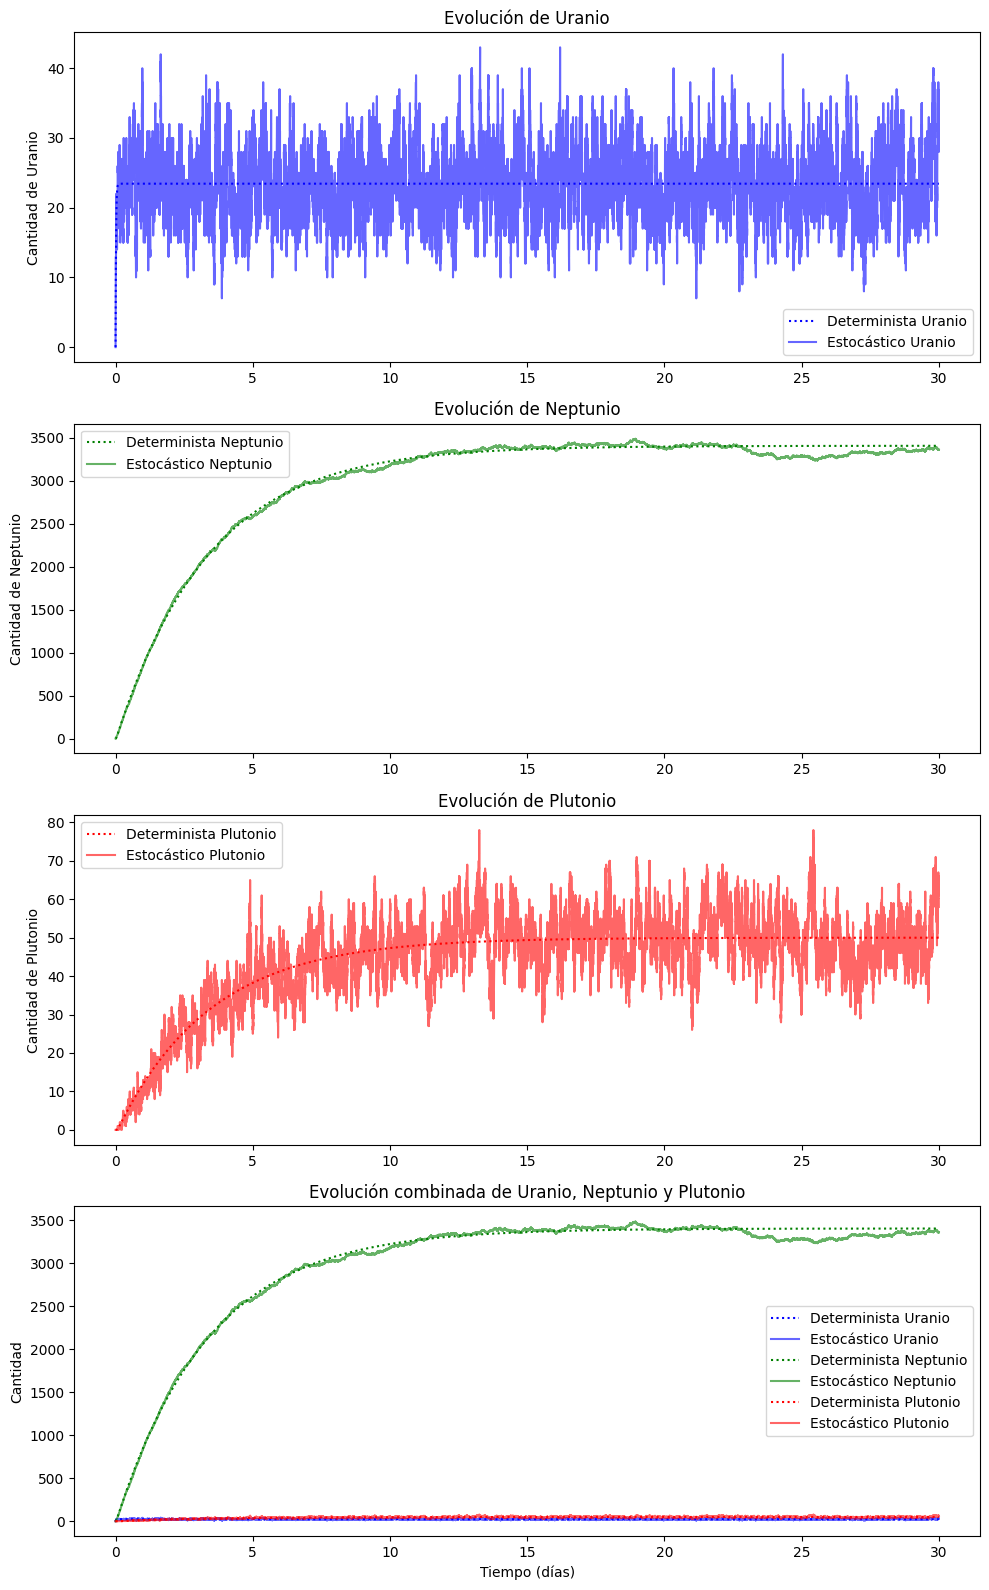

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación determinista
def simulacion_determinista(duracion, paso_tiempo=0.01):
    t = np.arange(0, duracion + paso_tiempo, paso_tiempo)
    uranio, neptunio, plutonio = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)
    uranio[0], neptunio[0], plutonio[0] = 0, 0, 0  

    for i in range(1, len(t)):
        delta_U = tasa_A - constante_U * uranio[i - 1]
        delta_Np = constante_U * uranio[i - 1] - constante_Np * neptunio[i - 1]
        delta_Pu = constante_Np * neptunio[i - 1] - tasa_B * plutonio[i - 1]

        uranio[i] = uranio[i - 1] + delta_U * paso_tiempo
        neptunio[i] = neptunio[i - 1] + delta_Np * paso_tiempo
        plutonio[i] = plutonio[i - 1] + delta_Pu * paso_tiempo

    return t, uranio, neptunio, plutonio

# Simulación estocástica
def simulacion_estocastica(duracion, paso_tiempo=0.01):
    t_actual = 0
    uranio, neptunio, plutonio = 0, 0, 0
    tiempo, uranio_hist, neptunio_hist, plutonio_hist = [0], [uranio], [neptunio], [plutonio]

    while t_actual < duracion:
        tasas = np.array([tasa_A, uranio * constante_U, neptunio * constante_Np, plutonio * tasa_B])
        tasa_total = tasas.sum()
        if tasa_total == 0:
            break

        tau = np.random.exponential(1 / tasa_total)
        t_actual += tau

        if t_actual > duracion:
            break

        reaccion = np.random.choice([0, 1, 2, 3], p=tasas / tasa_total)

        if reaccion == 0:
            uranio += 1
        elif reaccion == 1:
            uranio -= 1
            neptunio += 1
        elif reaccion == 2:
            neptunio -= 1
            plutonio += 1
        elif reaccion == 3:
            plutonio -= 1

        tiempo.append(t_actual)
        uranio_hist.append(uranio)
        neptunio_hist.append(neptunio)
        plutonio_hist.append(plutonio)

    return np.array(tiempo), np.array(uranio_hist), np.array(neptunio_hist), np.array(plutonio_hist)

# Parámetros
tasa_A = 1000
tasa_B = 20
constante_U = np.log(2) / (23.4 / 1440)
constante_Np = np.log(2) / 2.36

duracion_total = 30
tiempo_det, uranio_det, neptunio_det, plutonio_det = simulacion_determinista(duracion_total)
tiempo_estoc, uranio_estoc, neptunio_estoc, plutonio_estoc = simulacion_estocastica(duracion_total)

datos_det = [uranio_det, neptunio_det, plutonio_det]
datos_estoc = [uranio_estoc, neptunio_estoc, plutonio_estoc]
nombres = ["Uranio", "Neptunio", "Plutonio"]
colores = ['blue', 'green', 'red']  # Cambié los colores

# Gráficas
fig, graficas = plt.subplots(4, 1, figsize=(10, 16))
for i in range(3):
    graficas[i].plot(tiempo_det, datos_det[i], label=f"Determinista {nombres[i]}", color=colores[i], linestyle='dotted')
    graficas[i].plot(tiempo_estoc, datos_estoc[i], label=f"Estocástico {nombres[i]}", color=colores[i], alpha=0.6)
    graficas[i].set_ylabel(f"Cantidad de {nombres[i]}")
    graficas[i].set_title(f"Evolución de {nombres[i]}")
    graficas[i].legend()

for i in range(3):
    graficas[3].plot(tiempo_det, datos_det[i], label=f"Determinista {nombres[i]}", color=colores[i], linestyle='dotted')
    graficas[3].plot(tiempo_estoc, datos_estoc[i], label=f"Estocástico {nombres[i]}", color=colores[i], alpha=0.6)

graficas[3].set_xlabel("Tiempo (días)")
graficas[3].set_ylabel("Cantidad")
graficas[3].set_title("Evolución combinada de Uranio, Neptunio y Plutonio")
graficas[3].legend()

plt.tight_layout()
plt.show()


En cada caso, es posible evidenciar la solución determinista y estocástica. En la última gráfica se pueden observar tanto la solución determinista como la estocástica para el Uranio, Neptunio y Plutonio. Es posible analizar el hecho de que para todos los casos, la solución estocástica siempre muestra ruido respecto a la determinista, la cual pareciera ser más sueve. Esto se debe a que la variabilidad adicional en las soluciones estocásticas, en comparación con las deterministas, surge porque los modelos estocásticos incluyen componentes aleatorios que simulan incertidumbre o ruido en el sistema. Esto hace que, incluso con las mismas condiciones iniciales, el resultado varíe en cada simulación, reflejando la naturaleza intrínseca de muchos procesos reales donde la aleatoriedad desempeña un papel crucial. En contraste, las soluciones deterministas siguen un conjunto de ecuaciones fijas, produciendo siempre el mismo resultado bajo las mismas condiciones iniciales, sin incorporar fluctuaciones aleatorias, lo que reduce la variabilidad y aumenta la previsibilidad del sistema.

b) Haga muchas simulaciones, y determine la probabilidad de que el nivel de Plutonio llegue a ser igual o mayor a 80. ¿Qué cambiaría en los parámetros de la simulación para disminuir esta probabilidad?

In [124]:
import numpy as np
import matplotlib.pyplot as plt

#Simulación determinista para la evolución de isótopos
def simulacion_determinista(duracion, paso_tiempo=0.01):
    tiempo = np.arange(0, duracion + paso_tiempo, paso_tiempo)
    uranio = np.zeros_like(tiempo)
    neptunio = np.zeros_like(tiempo)
    plutonio = np.zeros_like(tiempo)

    uranio[0], neptunio[0], plutonio[0] = 0, 0, 0  # Condiciones iniciales

    #Bucle para la evolución determinista
    for i in range(1, len(tiempo)):
        cambio_U = tasa_A - constante_U * uranio[i - 1]
        cambio_Np = constante_U * uranio[i - 1] - constante_Np * neptunio[i - 1]
        cambio_Pu = constante_Np * neptunio[i - 1] - tasa_B * plutonio[i - 1]

        uranio[i] = uranio[i - 1] + cambio_U * paso_tiempo
        neptunio[i] = neptunio[i - 1] + cambio_Np * paso_tiempo
        plutonio[i] = plutonio[i - 1] + cambio_Pu * paso_tiempo

    return tiempo, uranio, neptunio, plutonio

#Simulación estocástica para la evolución de isótopos
def simulacion_estocastica_completa(duracion, paso_tiempo=0.01):
    t = 0  # Tiempo inicial
    uranio, neptunio, plutonio = 0, 0, 0  # Cantidades iniciales

    #Listas para almacenar los resultados
    tiempo, lista_U, lista_Np, lista_Pu = [t], [uranio], [neptunio], [plutonio]

    #Bucle de evolución estocástica
    while t < duracion:
        # Tasas de cambio para cada especie
        tasas = np.array([tasa_A, uranio * constante_U, neptunio * constante_Np, plutonio * tasa_B])
        tasa_total = tasas.sum()

        #Condición para detenerse si no hay eventos
        if tasa_total == 0:
            break

        #Tiempo hasta el siguiente evento
        tau = np.random.exponential(1 / tasa_total)
        t += tau

        #Detenerse si se excede la duración total
        if t > duracion:
            break

        #Determinación del tipo de reacción que ocurre
        reaccion = np.random.choice(4, p=tasas / tasa_total)

        #Actualización de especies en función de la reacción ocurrida
        if reaccion == 0:
            uranio += 1
        elif reaccion == 1:
            uranio -= 1
            neptunio += 1
        elif reaccion == 2:
            neptunio -= 1
            plutonio += 1
        elif reaccion == 3:
            plutonio -= 1

        #Registro de los valores en listas
        tiempo.append(t)
        lista_U.append(uranio)
        lista_Np.append(neptunio)
        lista_Pu.append(plutonio)

    return np.array(tiempo), np.array(lista_U), np.array(lista_Np), np.array(lista_Pu)

#Parámetros para la simulación (En los comentarios explicamos qué representa cada constante)
tasa_A = 1000              #Tasa de producción de uranio
tasa_B = 20                #Tasa de extracción de plutonio
constante_U = np.log(2) / (23.4 / 1440)  #Constante de decaimiento del uranio
constante_Np = np.log(2) / 2.36          #Constante de decaimiento del neptunio
duracion_total = 30        #Duración de la simulación en días
simulaciones = 100         #Número de simulaciones estocásticas
umbral_plutonio = 80       #Umbral de niveles críticos de plutonio

#Contamos las veces que el nivel de plutonio alcanza o supera el umbral
conteo_exitos = 0

#Realizamos múltiples simulaciones estocásticas
for _ in range(simulaciones):
    _, _, _, plutonio_estoc = simulacion_estocastica_completa(duracion_total)
    if np.any(plutonio_estoc >= umbral_plutonio):
        conteo_exitos += 1

#Calculamos la probabilidad de superar el umbral
probabilidad = conteo_exitos / simulaciones
print(f'Probabilidad de que el nivel de plutonio sea >= {umbral_plutonio}: {probabilidad:.2f}')


Probabilidad de que el nivel de plutonio sea >= 80: 0.18


Para disminuir la probabilidad de que el nivel de plutonio alcance o supere el umbral crítico de 80, es fundamental ajustar parámetros que impacten directamente la acumulación de plutonio en el sistema. Una estrategia efectiva sería aumentar la tasa de extracción de plutonio tasa_B. Al hacerlo, se incrementaría la velocidad de remoción de plutonio, lo que contribuiría a una reducción significativa en su acumulación y, por ende, en la probabilidad de superar el umbral establecido.

Asimismo, es recomendable disminuir la producción diaria de uranio tasa_A. Esta acción no solo limitaría la cantidad de uranio disponible, sino que también resultaría en una menor generación de neptunio, lo que a su vez reduciría la formación de plutonio. De este modo, se podría mantener el nivel de plutonio dentro de márgenes más seguros.

Por último, aumentar las constantes de decaimiento del uranio y el neptunio (constante_U y constante_Np) puede ser otra alternativa válida. Un incremento en estas constantes aceleraría la desintegración de ambos isótopos, disminuyendo su presencia en el sistema antes de que los niveles de plutonio alcancen valores críticos. 

Proponemos estos ajustes con el fin de lograr una disminución efectiva en la probabilidad de que el nivel de plutonio supere el umbral de 0.8

                                                                    BONO

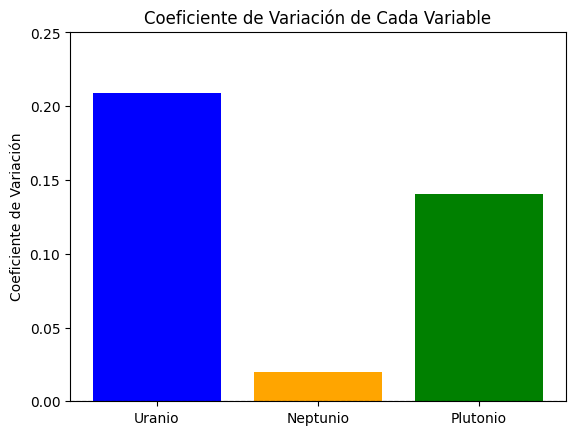

Coeficiente de variación para Uranio: 0.2087
Coeficiente de variación para Neptunio: 0.0198
Coeficiente de variación para Plutonio: 0.1406


In [127]:
num_simulaciones=100

# Almacenar los resultados de todas las simulaciones
uranio_results = []
neptunio_results = []
plutonio_results = []

for _ in range(num_simulaciones):
    _, uranio, neptunio, plutonio = simulacion_estocastica_completa(duracion_total)
    uranio_results.append(uranio[-1])  # Almacenar el último valor de uranio
    neptunio_results.append(neptunio[-1])  # Almacenar el último valor de neptunio
    plutonio_results.append(plutonio[-1])  # Almacenar el último valor de plutonio

# Calcular la media y desviación estándar
media_U = np.mean(uranio_results)
media_Np = np.mean(neptunio_results)
media_Pu = np.mean(plutonio_results)

desviacion_U = np.std(uranio_results)
desviacion_Np = np.std(neptunio_results)
desviacion_Pu = np.std(plutonio_results)

# Calcular el coeficiente de variación
coeficiente_variacion_U = desviacion_U / media_U
coeficiente_variacion_Np = desviacion_Np / media_Np
coeficiente_variacion_Pu = desviacion_Pu / media_Pu

# Graficar resultados
variables = ['Uranio', 'Neptunio', 'Plutonio']
coeficientes_variacion = [coeficiente_variacion_U, coeficiente_variacion_Np, coeficiente_variacion_Pu]

plt.bar(variables, coeficientes_variacion, color=['blue', 'orange', 'green'])
plt.ylabel('Coeficiente de Variación')
plt.title('Coeficiente de Variación de Cada Variable')
plt.ylim(0, max(coeficientes_variacion) * 1.2)  # Ajustar el límite superior del eje y
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

# Imprimir los resultados
print(f'Coeficiente de variación para Uranio: {coeficiente_variacion_U:.4f}')
print(f'Coeficiente de variación para Neptunio: {coeficiente_variacion_Np:.4f}')
print(f'Coeficiente de variación para Plutonio: {coeficiente_variacion_Pu:.4f}')


Los coeficientes de variación (CV) que calculamos para uranio, neptunio y plutonio reflejan diferentes niveles de variabilidad en sus concentraciones. Para el uranio, un CV de 0.2087 indica una alta fluctuación en los niveles, lo que sugiere que su gestión puede ser incierta y requiere atención especial. Por otro lado, el neptunio muestra un CV de solo 0.0198, lo que significa que su concentración es bastante estable, lo cual es positivo para su control y manejo en el sistema.

En cuanto al plutonio, con un CV de 0.1406, presenta una variabilidad moderada. Esto implica que aunque los niveles de plutonio son menos volátiles que los del uranio, aún deben ser monitoreados de cerca para evitar alcanzar niveles críticos. 

Por lo tanto, en conjunto, estos coeficientes de variación son útiles para entender cómo se comportan estos materiales y ayudar en la toma de decisiones sobre su manejo y seguridad en entornos nucleares, como es este caso.